# Module 4: Deep Learning

## Sprint 2: Natural Language Processing

## Subproject 1: Transformers Part 1

Natural language processing is as exciting as computer vision in the world of data scientists. There is a variety of consumer-facing applications of NLP systems, which can either help users (e.g. Apple Siri, Google Home) or companies (e.g. chatbots, [Google Duplex](https://www.youtube.com/watch?v=JvbHu_bVa_g) <-- check this video out, it's really cool 😎). There is a huge variety of applications for NLP systems, from sentiment classification, to text generation, to question answering. We will practice some of these concepts ourselves in the upcoming lessons.

You already had some introduction to NLP in the previous module, so this module assumes you have a good understanding of the material. We will focus mainly on the deep learning aspect of NLP. As in computer vision, deep learning is leaps ahead in NLP compared to classical ML approaches. Depending on the type of problem at hand and domain, you will most likely turn to deep learning to solve it.

## Learning outcomes:

- Transformers
- Attention mechanism
- HuggingFace library
- Bert/DistilBert transformer for text classification

---

## Transformers

<div style="text-align:center">
<div><img style="width:400px" src="https://i.pinimg.com/originals/a8/5d/f2/a85df270c1108423336caa1b152bee41.png"></img><div>
<div style="margin-bottom:20px; color:rgb(117, 117, 117);font-size:12px;">Source: https://www.pinterest.com/pin/318559373631411928/</div>
</div>

Today, we will start the NLP journey, by looking into the transformers - major breakthrough in NLP, which has significantly raised the SOTA bar for NLP tasks and has been also successfully applied to computer vision. The major difference from previous NLP solutions is that transformers managed to parallelize tasks that before were strictly sequential using their so-called "attention" mechanism, resulting in quicker computations, larger architectures, and training on vast collections of data. 

Start by reading the original paper from Google about the transformers  
- https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf  

Further material
- https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html  
- http://jalammar.github.io/illustrated-transformer/  
- https://www.youtube.com/watch?v=TQQlZhbC5ps  

Additional resources:  
- http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/  
- https://youtu.be/AFkGPmU16QA  
- https://www.tensorflow.org/tutorials/text/transformer  

I hope you got the rough idea about what transformers are and how they work. If everything makes sense - great! But don't worry if you still don't understand everything, as we will revisit the topics as we go along. For now, let's dive straight into the application of transformers. Once we get more intuition and understanding of how to apply it, we will go back to more theory about transformers in the tomorrow's material

For the remainder of the topic, we will use an amazing library - HuggingFace Transformers https://huggingface.co/transformers/quickstart.html  
Read through the intro to the HFT and make sure it is installed in your notebook.

## Exercise

<div style="text-align:center;"><img style="width:300px" src="https://i.guim.co.uk/img/media/2b9425ced15758b2bb32f4d15961a7a7c594874e/221_0_1535_922/master/1535.jpg?width=445&quality=85&auto=format&fit=max&s=71f14c2db1f7f97f81c8614c848e1e12"></img></div>

In this exercise, we will use the transformers to **classify** text. Using the [South Park lines dataset](https://www.kaggle.com/tovarischsukhov/southparklines) we will try to guess which character said which line. Even for a South Park aficionado, this sounds like a daunting task. Let's see if transformers are up for a challenge. 

Don't use the full dataset for now - choose your favorite 4 characters.

### EDA

Similarly to computer vision, textual information is not trivial to investigate. You should always use your imagination to try to get the most relevant info from data, depending on the problem at hand and what could be relevant. Refer to previous module lessons on EDA and feature engineering.

We will start with some basics

Tasks:
- Investigate anomalies in data
- What are sample counts for each character?
- What are word counts for each character?
  - Make a box plot of word counts per character
  - Display word count statistics per charracter (using pandas `.describe()`)
  - When classifying text we will need to have a fixed word count per sample. Decide from the statistics, what is a sensible number of words per sample
- Display some lines of each character

In [1]:
import pandas as pd


## basic stats

In [2]:
df = pd.read_csv("/content/All-seasons.csv")

In [6]:
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [5]:
df.info() # no missing data; good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70896 entries, 0 to 70895
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Season     70896 non-null  object
 1   Episode    70896 non-null  object
 2   Character  70896 non-null  object
 3   Line       70896 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [7]:
df.describe()

,Season,Episode,Character,Line
count,70896,70896,70896,70896
unique,19,19,3950,64301
top,2,10,Cartman,What?\n
freq,6416,5271,9774,361


## more depth

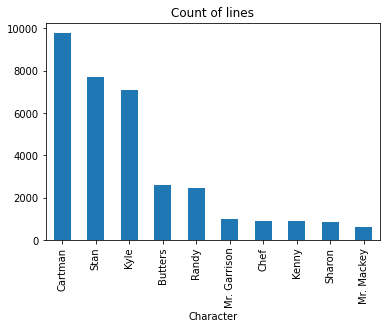

In [20]:
character_count = df.groupby("Character").count().sort_values("Line", ascending=False)[:10]["Line"]
character_count.plot(kind="bar", title="Count of lines")

### Data preprocessing

Next, we will need to do some data preprocessing. As you know, computers don't understand unstructured data, in this case, text. It does, however, understand numbers. So we will need to prepare our data into computer-readable format.

Start with tasks you already know:
- Clean-up text (remove redundant white-space, chars)
- Convert class names into class indices
- Any other preprocessing steps you have learned in previous lessons, which you think are valuable

Next, you will need to tokenize text. You have already learned about text tokenization in the previous module. Use materials below if you need to refresh your memory:  
- https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html  
- https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/  
- https://www.youtube.com/watch?v=fNxaJsNG3-s  

Tasks:
- Play around with HuggingFace tokenizers https://huggingface.co/transformers/main_classes/tokenizer.html and see if you can convert Southpark lines to tokens. 

    Hint: use `distilbert-base-uncased` pretrained tokenizer


- Then build a data preprocessing pipeline for your model using the tokenizer

    Hint: Use PyTorch dataset and dataloader


In [ ]:
# instructor

df_train.head(3)

,Season,Episode,Character,Line,LineLength,NumWords,Character_enc
0,3,8,Randy,What's happened to you?! You've become all nee...,69,11,3
1,2,9,Chef,"Children, this whole film festival thing has q...",174,28,1
2,10,12,Butters,"Well, how come we've gotta come all the way ou...",54,11,0


### Model

Next, we will build and train a classification model. We will be taking advantage of transfer learning and using a pre-trained model from HuggingFace. The HuggingFace API provides us models for `SequenceClassification`. If you used DistilBert for the tokenizer, you should checkout out [DistilBertForSequenceClassification](https://huggingface.co/transformers/model_doc/distilbert.html#distilbertforsequenceclassification). Otherwise, choose appropriate model for your configuration.

Check out the tutorial from HuggingFace on how to fine-tune a pre-trained model:
- https://huggingface.co/transformers/training.html


Tasks:
- Build and train model
- Plot training/validation loss
- Choose and calculate metrics on a test set
- Evaluate model performance
- You should be using PyTorch-Lightning for training

### Evaluation

Once you trained a model, it is time to test it on test_data. 

Tasks:
- Predict samples from test dataset
- Make a confusion matrix
- Create a classification report from sklearn

---

## Summary

In this lesson, we learned how to use transformers from HuggingFace library. This is a great library as it has a lot of pre-trained transformer models and a public repository, so new models and architectures are uploaded by the public every day. It has a very easy API, so without much drama, we were able to adapt a pre-trained transformer for text classification.

The results likely were not very good, but let's give ourselves a break because the task was pretty hard. By looking at some lines that the characters say, it is quite hard to make any conclusions about which one it is. Without more context that is.

This was the first part of the transformers workshop. In the next lesson, we will continue